In [13]:
from sklearn.preprocessing import StandardScaler
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
model2 = SVC()
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=30)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=1)

In [14]:
data = pd.read_csv("MS.csv")

In [15]:
data['Label'] = data['Close'].shift(-1)
data['Label'] = (data['Label'] > data['Close']).astype(int)
data.dropna(inplace=True)
features = ['Open', 'High', 'Low', 'Volume']
x_scaled = data[features]
y = data['Label']

# Split the data into training and testing sets
x_train,x_test,y_train,y_test  = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
def fit_predict(t):
    start_time = time.time()
    t.fit(x_train, y_train)
    end_time = time.time()
    print("Training time: ",end_time-start_time)
    start_time = time.time()
    y_test_predict = t.predict(x_test)
    end_time = time.time()
    print("Testing time: ",end_time-start_time)
    return y_test_predict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_mat(y_test,f):
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(
      confusion_matrix(y_test, f))
    cmp.plot(ax=ax)
    plt.show();
def accuracy(y_true, y_pred):
    correct_predictions = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_predictions += 1
    print("accuracy = " + str(correct_predictions / len(y_true)))
from sklearn.metrics import recall_score, precision_score, f1_score
def metrics(y_test,y_pred):
    print("*********micro  *******")
    print('Recall : %.3f' % recall_score(y_test, y_pred,average='micro'))
    print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))
    print("*********macro  *******")
    print('Recall : %.3f' % recall_score(y_test, y_pred,average='macro'))
    print('Precision: %.3f' % precision_score(y_test, y_pred,average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='macro'))
def evaluating_model(model,actual_val):
    print("name of the model ---  ")
    print(model)
    print("*****predicting values****")
    f = fit_predict(model)
    print()
    print("******evaluating model ****")
    accuracy(f,actual_val)
    print()
    metrics(f,actual_val)
    print()
    plot_mat(actual_val,f)
    print("********")

name of the model ---  
LogisticRegression()
*****predicting values****
Training time:  0.0057871341705322266
Testing time:  0.00201416015625

******evaluating model ****
accuracy = 0.5083179297597042

*********micro  *******
Recall : 0.508
Precision: 0.508
F1 Score: 0.508
*********macro  *******
Recall : 0.254
Precision: 0.500
F1 Score: 0.337



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


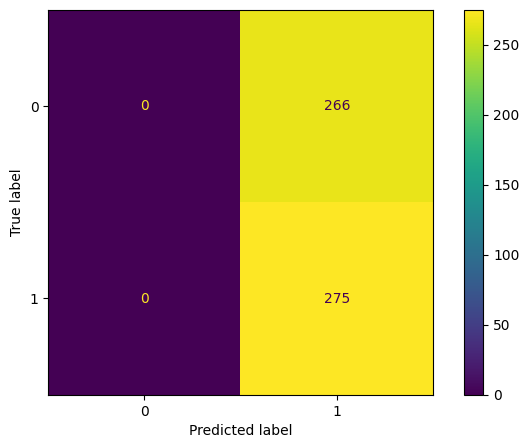

********


In [16]:
evaluating_model(model1,y_test)

name of the model ---  
SVC()
*****predicting values****
Training time:  0.18997597694396973
Testing time:  0.06308388710021973

******evaluating model ****
accuracy = 0.48428835489833644

*********micro  *******
Recall : 0.484
Precision: 0.484
F1 Score: 0.484
*********macro  *******
Recall : 0.478
Precision: 0.481
F1 Score: 0.464



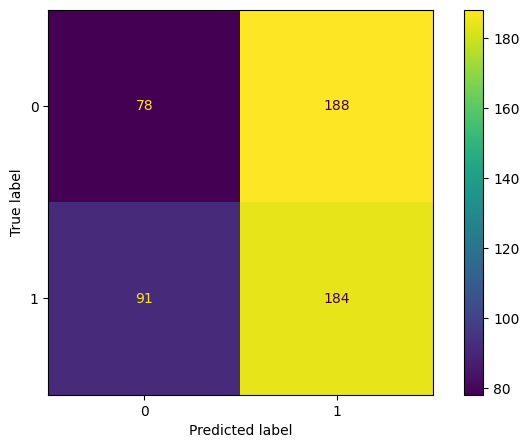

********


In [17]:
evaluating_model(model2,y_test)

name of the model ---  
KNeighborsClassifier()
*****predicting values****
Training time:  0.004801750183105469
Testing time:  0.02878856658935547

******evaluating model ****
accuracy = 0.4879852125693161

*********micro  *******
Recall : 0.488
Precision: 0.488
F1 Score: 0.488
*********macro  *******
Recall : 0.487
Precision: 0.487
F1 Score: 0.487



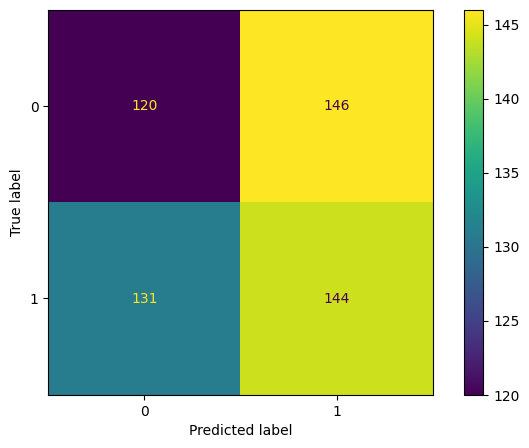

********


In [18]:
evaluating_model(model4,y_test)

In [1]:
param = {
    'n_neighbors' : [3, 5, 7, 11, 14, 16, 17, 21],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2]

}
grid_cv = GridSearchCV(model4, param_grid=param)
grid_cv.fit(x_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [20]:
grid_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}

In [21]:
n_neighbors_value = 5
weights_value = 'distance'
p_value = 2

name of the model ---  
KNeighborsClassifier(p=1)
*****predicting values****
Training time:  0.00554347038269043
Testing time:  0.05561423301696777

******evaluating model ****
accuracy = 0.4879852125693161

*********micro  *******
Recall : 0.488
Precision: 0.488
F1 Score: 0.488
*********macro  *******
Recall : 0.487
Precision: 0.487
F1 Score: 0.487



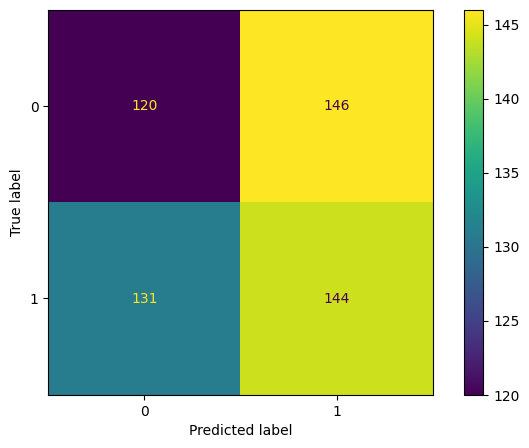

********


In [25]:
model4 = KNeighborsClassifier(n_neighbors=5, p=1)
evaluating_model(model4,y_test)

name of the model ---  
RandomForestClassifier(n_estimators=30)
*****predicting values****
Training time:  0.2271876335144043
Testing time:  0.00793600082397461

******evaluating model ****
accuracy = 0.48613678373382624

*********micro  *******
Recall : 0.486
Precision: 0.486
F1 Score: 0.486
*********macro  *******
Recall : 0.486
Precision: 0.486
F1 Score: 0.486



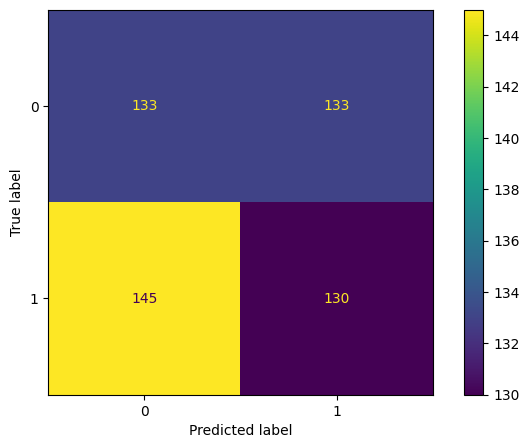

********


In [23]:
evaluating_model(model6,y_test)

name of the model ---  
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=0)
*****predicting values****
Training time:  0.15132355690002441
Testing time:  0.012334108352661133

******evaluating model ****
accuracy = 0.47689463955637706

*********micro  *******
Recall : 0.477
Precision: 0.477
F1 Score: 0.477
*********macro  *******
Recall : 0.476
Precision: 0.476
F1 Score: 0.476



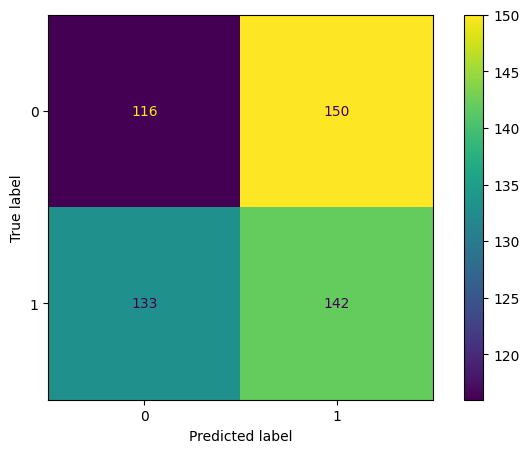

********


In [24]:
clf = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=0)
evaluating_model(clf,y_test)